In [1]:
import bagpy
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation as R

In [2]:
### load bag file
b = bagreader('trackPeriod.bag')

[INFO]  Data folder trackPeriod already exists. Not creating.


In [3]:
### check topics and types
print(b.topic_table)

                                   Topics                           Types  \
0                             /calibrated                   std_msgs/Bool   
1                                  /clock             rosgraph_msgs/Clock   
2             /darknet_ros/bounding_boxes  darknet_ros_msgs/BoundingBoxes   
3   /darknet_ros/check_for_objects/status  actionlib_msgs/GoalStatusArray   
4            /darknet_ros/detection_image               sensor_msgs/Image   
..                                    ...                             ...   
71                   /summit_xl/scan_rear           sensor_msgs/LaserScan   
72       /summit_xl/slam_gmapping/entropy                std_msgs/Float64   
73                /summit_xl/twist_marker       visualization_msgs/Marker   
74                                    /tf              tf2_msgs/TFMessage   
75                             /tf_static              tf2_msgs/TFMessage   

    Message Count   Frequency  
0               1         NaN  
1          

In [4]:
### get velocity data
velmsgs   = b.vel_data()

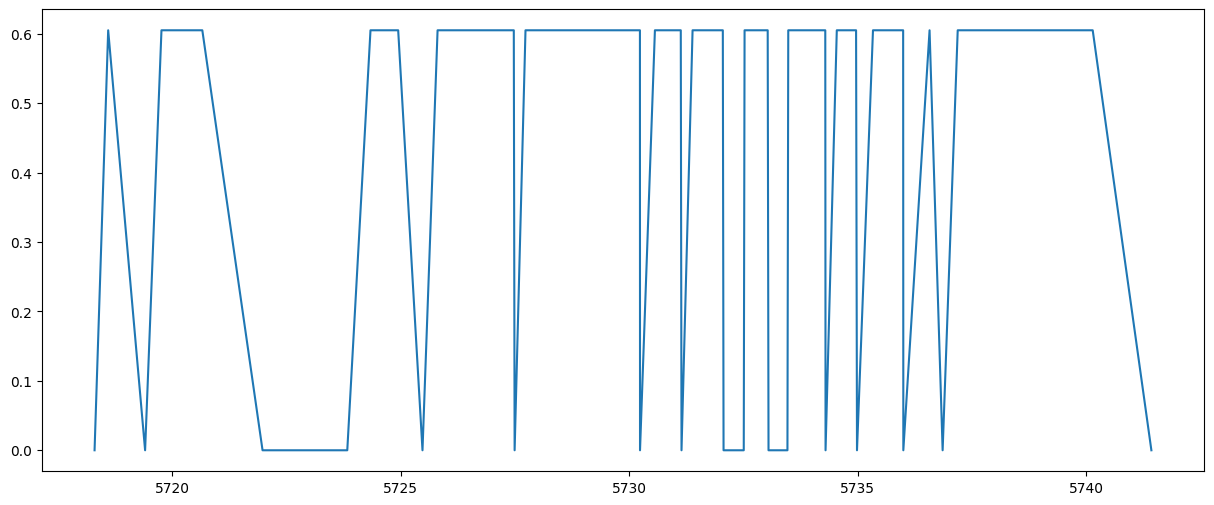

In [5]:
### plot linear velocity in x direction over time
veldf = pd.read_csv(velmsgs[0])
veldf
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(veldf['Time'], veldf['linear.x'])

In [6]:
### get IMU data
IMU_MSG = b.message_by_topic('/summit_xl/imu/data')
df_imu = pd.read_csv(IMU_MSG)
df_imu


,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,orientation.x,orientation.y,orientation.z,orientation.w,orientation_covariance_0,...,linear_acceleration.z,linear_acceleration_covariance_0,linear_acceleration_covariance_1,linear_acceleration_covariance_2,linear_acceleration_covariance_3,linear_acceleration_covariance_4,linear_acceleration_covariance_5,linear_acceleration_covariance_6,linear_acceleration_covariance_7,linear_acceleration_covariance_8
0,5712.880,279389,5712,880000000,summit_xl_imu_link,-0.000002,-0.000003,-0.865856,-0.500294,0.0,...,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5712.898,279390,5712,900000000,summit_xl_imu_link,-0.000002,-0.000003,-0.865856,-0.500294,0.0,...,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5712.920,279391,5712,920000000,summit_xl_imu_link,-0.000002,-0.000003,-0.865855,-0.500294,0.0,...,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5712.940,279392,5712,940000000,summit_xl_imu_link,-0.000002,-0.000003,-0.865855,-0.500295,0.0,...,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5712.960,279393,5712,960000000,summit_xl_imu_link,-0.000002,-0.000003,-0.865855,-0.500295,0.0,...,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,5743.920,280941,5743,920000000,summit_xl_imu_link,-0.000003,0.000003,0.654553,-0.756016,0.0,...,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1553,5743.940,280942,5743,940000000,summit_xl_imu_link,-0.000003,0.000003,0.654553,-0.756016,0.0,...,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1554,5743.960,280943,5743,960000000,summit_xl_imu_link,-0.000003,0.000003,0.654554,-0.756016,0.0,...,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1555,5743.980,280944,5743,980000000,summit_xl_imu_link,-0.000003,0.000003,0.654554,-0.756015,0.0,...,9.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
### get quaternions of orientation, converting to Euler data
rx = df_imu['orientation.x']
ry = df_imu['orientation.y']
rz = df_imu['orientation.z']
rw = df_imu['orientation.w']
rotation_quat = np.array([rx,ry,rz,rw]).reshape(-1,4)
r = R.from_quat(rotation_quat)
orientation = r.as_euler('zxy', degrees=True)

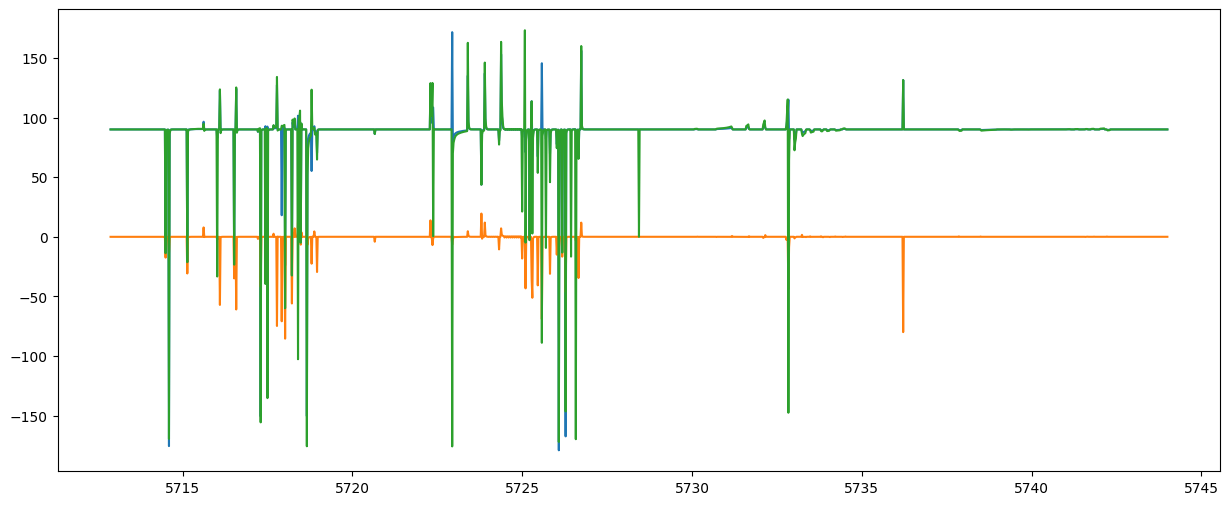

In [8]:
### plot the orientation over time
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(df_imu['Time'], orientation)